# Stock Market Analysis and Prediction #

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten

# For time stamps
from datetime import datetime
import math


### Importing Data using Yahoo Finance Library ###

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NVDA']


end = datetime.now()
start = datetime(end.year - 1 , end.month, end.day) ## recovering historical data for last 2 year for each stock

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, NVDA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA", "NVIDIA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
num_companies = len(company_list)
num_cols = 2
num_rows = math.ceil(num_companies / num_cols)

df = pd.concat(company_list, axis=0)
df



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-28,180.089996,180.589996,178.550003,180.190002,179.272644,43820700,APPLE
2023-08-29,179.699997,184.899994,179.500000,184.119995,183.182632,53003900,APPLE
2023-08-30,184.940002,187.850006,184.740005,187.649994,186.694672,60813900,APPLE
2023-08-31,187.839996,189.119995,187.479996,187.869995,186.913544,60794500,APPLE
2023-09-01,189.490005,189.919998,188.279999,189.460007,188.495453,45732600,APPLE
...,...,...,...,...,...,...,...
2024-08-22,130.020004,130.750000,123.099998,123.739998,123.739998,376189100,NVIDIA
2024-08-23,125.860001,129.600006,125.220001,129.369995,129.369995,323230300,NVIDIA
2024-08-26,129.570007,131.259995,124.370003,126.459999,126.459999,331964700,NVIDIA


### Descriptive Data Statisitc ###

In [3]:
for company, com_name in zip(company_list, company_name):
    print(f'For Company: {com_name}')
    
    print("Genral information about:\n")
    print(company.info())
    
    print("Descriptive statistics:\n")
    print(company.describe())
    print("\n" + "="*80 + "\n")

For Company: APPLE
Genral information about:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-08-28 to 2024-08-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB
None
Descriptive statistics:

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   189.969209  191.752688  188.382569  190.164822  189.633237   
std     18.031594   18.291867   17.667613   18.031096   18.192422   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%   

### Close Price tracking ###
Closer time price tracking is crucial as it is an indicator of the performance of the stock which directly influences the prediction of stock

In [4]:
fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    subplot_titles=company_name
)

# Add the adjusted close price of each company to the subplot
for i, company in enumerate(company_list):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    
    fig.add_trace(
        go.Scatter(x=company.index, y=company['Adj Close'], mode='lines', name=company_name[i]),
        row=row, col=col
    )

# Update layout to adjust titles, size, etc.
fig.update_layout(
    title_text="Closing Prices of Tech Stocks",
    height=800,
    showlegend=False,
    template="plotly_white"
)

# Update x-axis and y-axis labels for all subplots
for i in range(1, num_rows + 1):
    fig.update_xaxes(title_text="Date", row=i, col=1)
    fig.update_xaxes(title_text="Date", row=i, col=2)
    
for j in range(1, num_cols + 1):
    fig.update_yaxes(title_text="Adjusted Close Price", row=1, col=j)
    if num_rows > 1:
        fig.update_yaxes(title_text="Adjusted Close Price", row=2, col=j)
    if num_rows > 2:
        fig.update_yaxes(title_text="Adjusted Close Price", row=3, col=j)

# Show the interactive plot
fig.show()

### Volume of sales ###
the exchange of the quantity or amount of asset trtansfer per day can show how actively the stock is being sold or bought between different investors. it displays sentiment around the particular stock which influences buyers, it also indicates the liquidity as in whihch stock can be easily sold or bought.

In [5]:
fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    subplot_titles=company_name
)

# Add the adjusted close price of each company to the subplot
for i, company in enumerate(company_list):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    
    fig.add_trace(
        go.Scatter(x=company.index, y=company['Volume'], mode='lines', name=company_name[i]),
        row=row, col=col
    )

# Update layout to adjust titles, size, etc.
fig.update_layout(
    title_text="Volume of Tech Stocks",
    height=800,
    showlegend=False,
    template="plotly_white"
)

# Update x-axis and y-axis labels for all subplots
for i in range(1, num_rows + 1):
    fig.update_xaxes(title_text="Date", row=i, col=1)
    fig.update_xaxes(title_text="Date", row=i, col=2)
    
for j in range(1, num_cols + 1):
    fig.update_yaxes(title_text="Sales volume", row=1, col=j)
    fig.update_yaxes(title_text="Sales volume", row=2, col=j)
    if num_rows > 2:
        fig.update_yaxes(title_text="Sales volume", row=3, col=j)

# Show the interactive plot
fig.show()


### Implementing Moving average of the various Stocks ###
Moving average is a simple technique of registering cummilative avergaes over short period of time for identifying trends by smoothing out short term fluctuations and highlighting longe term trends. MA can act as a threshold or a baseline for prediction as a safer bet for the buyers as it can be used as buy or sell signals for daily traders. It also helps as a volatility measure as large deviation from MA can mean high volatility.

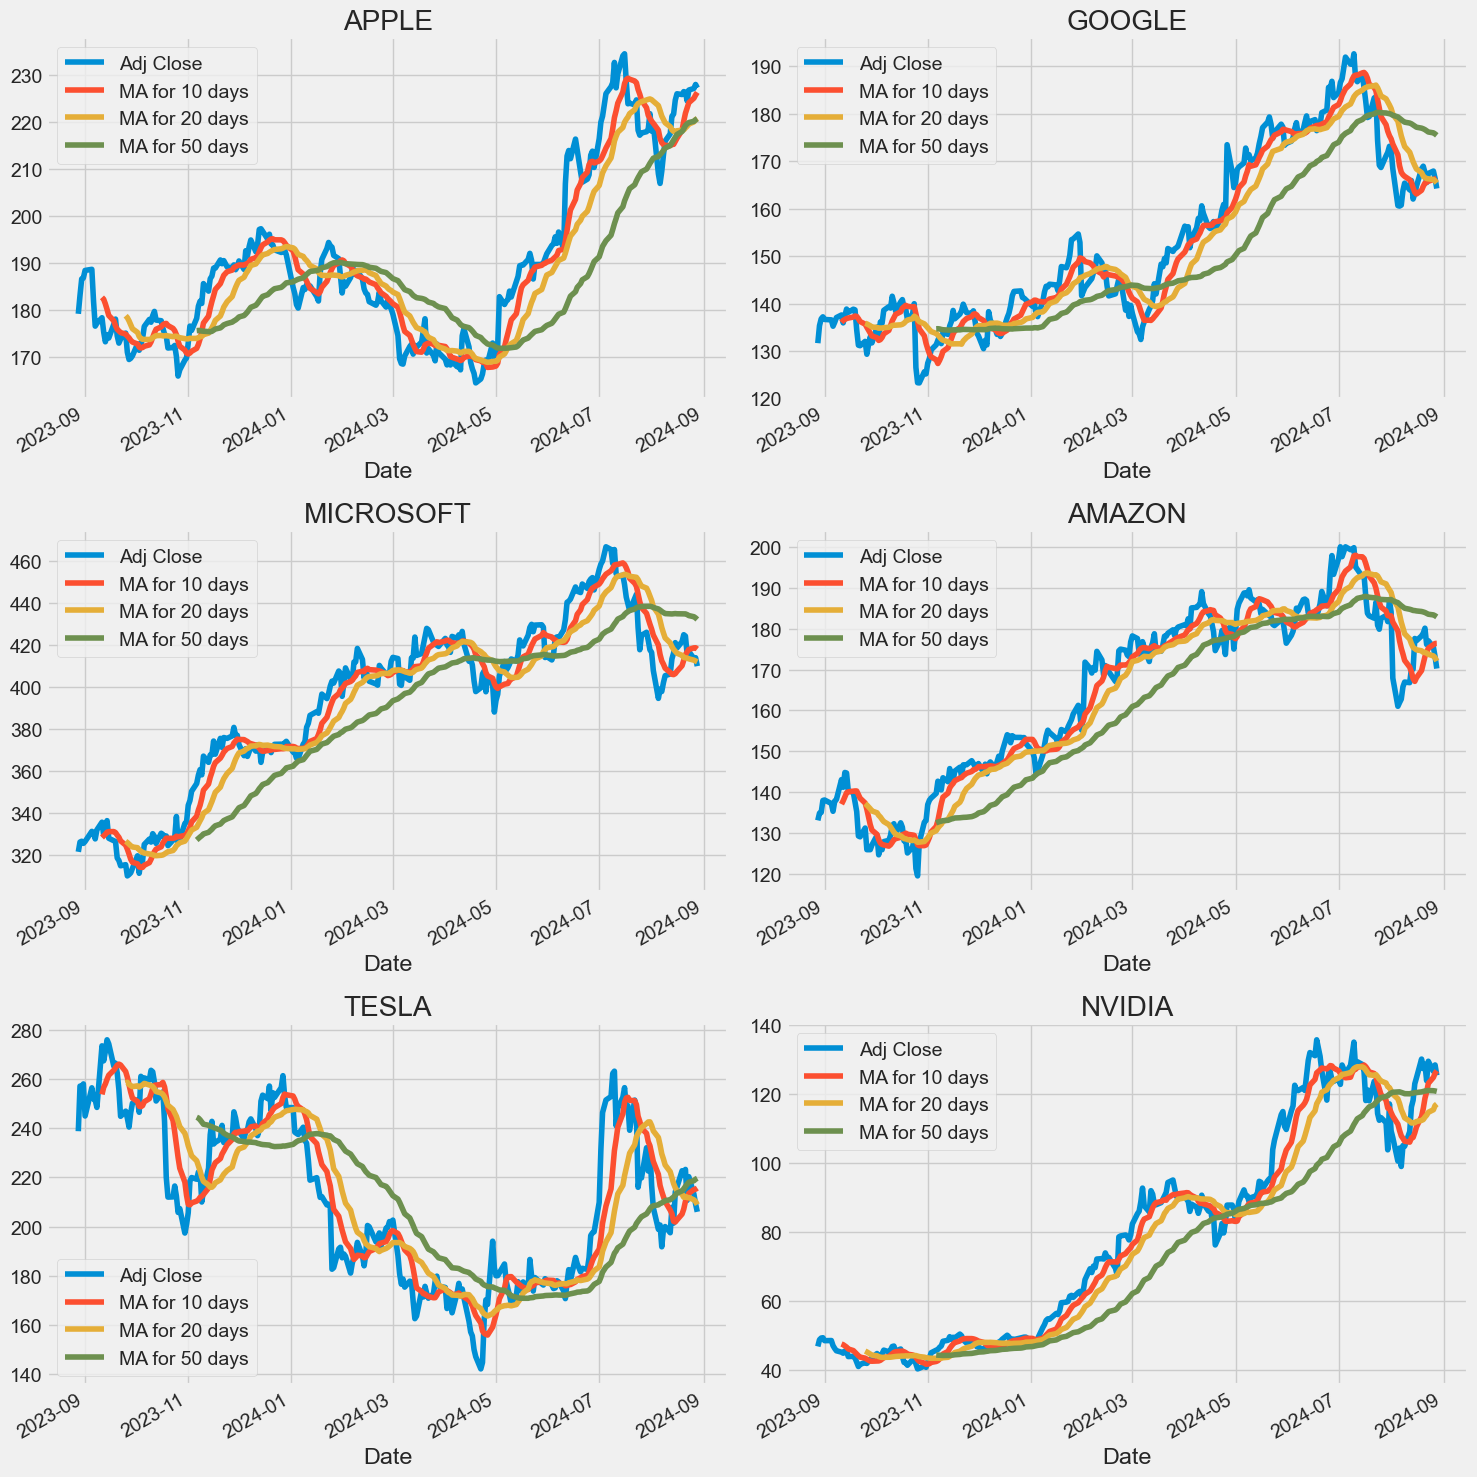

In [6]:
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    for company_df in company_list:
        column_name = f"MA for {ma} days"
        company_df[column_name] = company_df['Adj Close'].rolling(ma).mean()



# Create subplots dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot data for each company
for ax, company_df, name in zip(axes, company_list, company_name):
    company_df[['Adj Close'] + [f"MA for {ma} days" for ma in ma_day]].plot(ax=ax)
    ax.set_title(name)

# Hide any unused subplots
for ax in axes[len(company_list):]:
    ax.set_visible(False)

# Adjust layout
fig.tight_layout()
plt.show()

# Daily Return of the stock #
In this section we are going to analyze the risk of the stocks. We will look at daily changes of the stock and not just the absolute values 

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    subplot_titles=company_name
)

# Add traces for each company dynamically
for i, company_df in enumerate(company_list):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    fig.add_trace(
        go.Scatter(
            x=company_df.index,
            y=company_df['Daily Return'],
            mode='lines+markers',
            name=company_name[i],
            line=dict(dash='dash'),
            marker=dict(symbol='circle')
        ),
        row=row, col=col
    )

# Update layout for better appearance
fig.update_layout(
    height=800,
    width=1200,
    title_text="Daily Returns of Companies",
    showlegend=False,
    template="plotly_white"
)

# Update x-axis and y-axis labels for all subplots
for i in range(1, num_rows + 1):
    fig.update_xaxes(title_text="Date", row=i, col=1)
    fig.update_xaxes(title_text="Date", row=i, col=2)
    
for j in range(1, num_cols + 1):
    fig.update_yaxes(title_text="Daily Return", row=1, col=j)
    if num_rows > 1:
        fig.update_yaxes(title_text="Daily Return", row=2, col=j)
    if num_rows > 2:
        fig.update_yaxes(title_text="Daily Return", row=3, col=j)

# Show the interactive plot
fig.show()

In [8]:
# Create subplots with dynamic rows and columns
fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    subplot_titles=company_name
)

# Add histogram traces for each company dynamically
for i, company_df in enumerate(company_list):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    fig.add_trace(
        go.Histogram(
            x=company_df['Daily Return'],
            nbinsx=50,
            name=company_name[i],
            hovertemplate=
                '<b>Company:</b> %{meta}<br>' +
                '<b>Daily Return:</b> %{x:.4f}<br>' +
                '<b>Count:</b> %{y}<extra></extra>',
            meta=company_name[i]
        ),
        row=row, col=col
    )

# Update layout for better appearance
fig.update_layout(
    height=800,
    width=1200,
    title_text="Histogram of Daily Returns for Companies",
    showlegend=False,
    template="plotly_white"
)

# Update x-axis and y-axis labels for all subplots
for i in range(1, num_rows + 1):
    fig.update_xaxes(title_text="Daily Return", row=i, col=1)
    fig.update_xaxes(title_text="Daily Return", row=i, col=2)
    
for j in range(1, num_cols + 1):
    fig.update_yaxes(title_text="Counts", row=1, col=j)
    if num_rows > 1:
        fig.update_yaxes(title_text="Counts", row=2, col=j)
    if num_rows > 2:
        fig.update_yaxes(title_text="Counts", row=3, col=j)

# Show the interactive plot
fig.show()

# Correaltion between different stocks closing price # 
Correlation measures the association instead of 'X' causing 'Y', it shows the effect caused by third factor

In [9]:
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Check the first few rows of the closing prices DataFrame
print(closing_df.head())

# Create a new DataFrame for tech returns by calculating the percentage change
tech_rets = closing_df.pct_change()

# Check the first few rows of the tech returns DataFrame
print(tech_rets.head())

# Drop the first row with NaN values (optional)
tech_rets.dropna(inplace=True)

[*********************100%%**********************]  6 of 6 completed

Ticker            AAPL        AMZN        GOOG        MSFT       NVDA  \
Date                                                                    
2023-08-28  179.272644  133.139999  131.640198  321.288391  46.820984   
2023-08-29  183.182617  134.910004  135.335999  325.963287  48.769402   
2023-08-30  186.694672  135.070007  136.774353  326.340454  49.249252   
2023-08-31  186.913528  138.009995  137.193878  325.318146  49.340225   
2023-09-01  188.495453  138.119995  136.644501  326.211426  48.494484   

Ticker            TSLA  
Date                    
2023-08-28  238.820007  
2023-08-29  257.179993  
2023-08-30  256.899994  
2023-08-31  258.079987  
2023-09-01  245.009995  
Ticker          AAPL      AMZN      GOOG      MSFT      NVDA      TSLA
Date                                                                  
2023-08-28       NaN       NaN       NaN       NaN       NaN       NaN
2023-08-29  0.021810  0.013294  0.028075  0.014550  0.041614  0.076878
2023-08-30  0.019172  0.00118

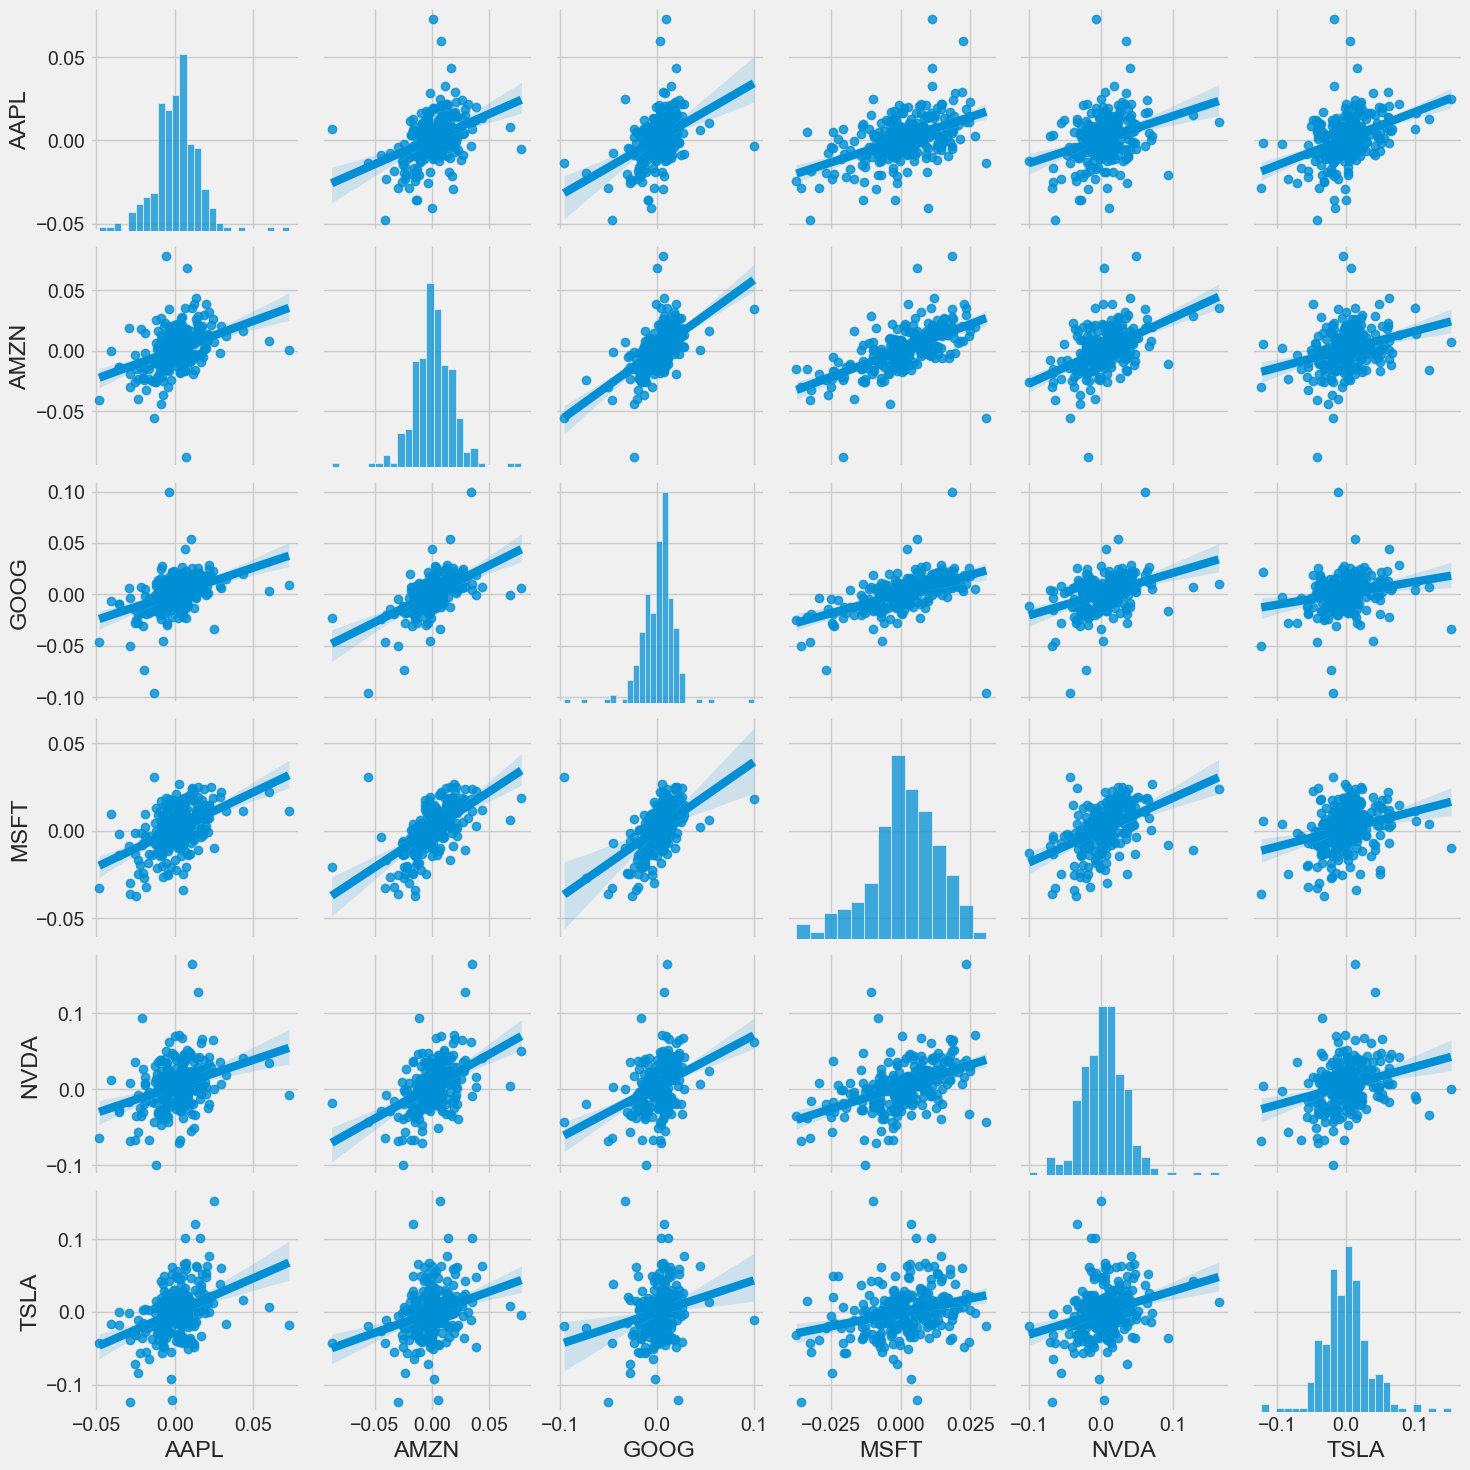

In [10]:

sns.pairplot(tech_rets, kind='reg')

### In the above graohs we can clearly obserbve that 'Google', 'Nvidia' and 'Amazon' have direct correlation with 'Microsoft' that is their closing stock price are correalted. It would be beneficial to study the pairs and how each stock of these pairs affect each other. ###

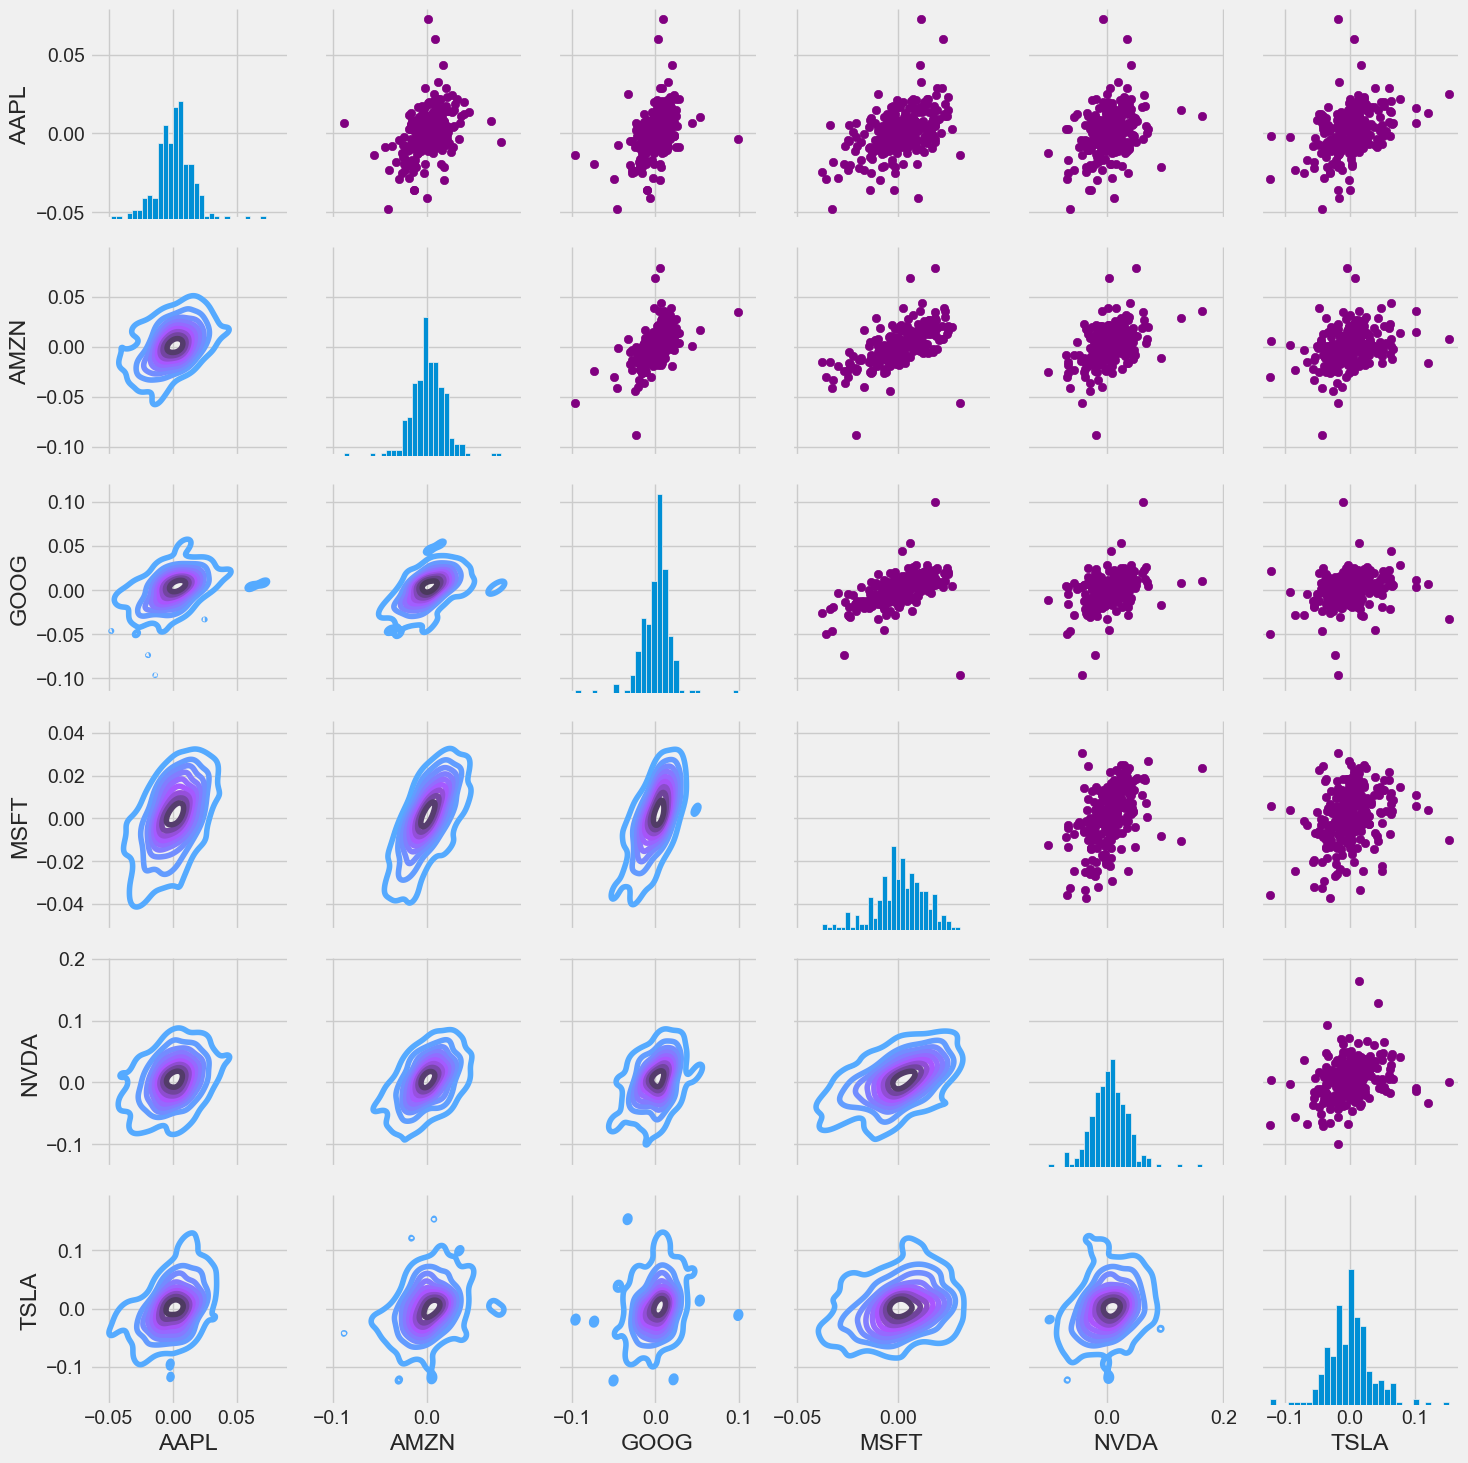

In [11]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

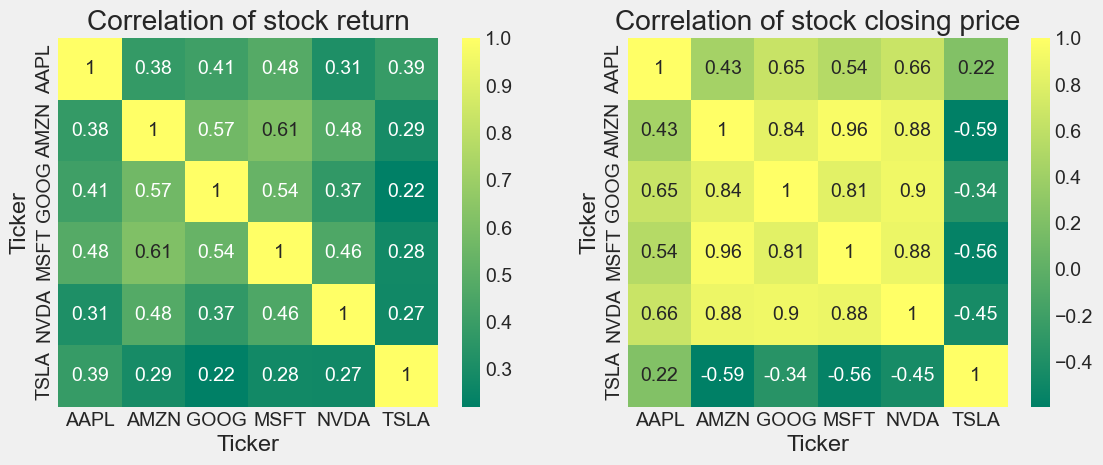

In [12]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Risk in investing in each company stock #
We can calculate the risk generated by comparing the expected return with the satndard deviation of the daily return. This is the basic method for risk calculation

In [13]:
rets = tech_rets.dropna()
area = (rets.std() * 100) ** 2  # Squaring to emphasize differences in risk

# Define the color scale for expected return, from green (low return) to red (high return)
color_scale = [
    [0, 'red'],
    [0.5, 'yellow'],
    [1, 'green']
]

# Create a scatter plot
scatter = go.Scatter(
    x=rets.mean() * 100,  # Convert to percentage for x-axis
    y=rets.std() * 100,   # Convert to percentage for y-axis
    mode='markers+text',
    marker=dict(
        size=area,  # Use the calculated area for the marker size, scaled by risk
        sizemode='area',
        sizeref=2.*max(area)/(100.**2),  # Adjust size scaling for better visualization
        sizemin=4,
        color=(rets.mean()/rets.std()) * 100,  # Color by expected return
        colorscale=color_scale,  # Apply color scale
        colorbar=dict(
            title='Expected Return (%)'
        ),
        line=dict(width=1, color='black')
    ),
    text=rets.columns,
    textposition='top center',
    hovertemplate=
        '<b>%{text}</b><br>' +
        'Expected Return: %{x:.2f}%<br>' +
        'Risk (Std Dev): %{y:.2f}%<extra></extra>' 
)

# Layout for the plot
layout = go.Layout(
    title='Interactive Risk vs. Expected Return',
    xaxis=dict(title='Expected Return (%)'),
    yaxis=dict(title='Risk (Standard Deviation %)'),
    hovermode='closest',
    showlegend=False,
    height=700,
    width=900
)

# Create the figure
fig = go.Figure(data=[scatter], layout=layout)

# Show the interactive plot
fig.show()

### According the graph above, we can clearly state that 'Tesla' is a high risk Stock with the lowest return percentage and would not be an ideal stock to invest whereas ' Nvidia' has highest expected return percentage value still has high risk percentage stock value. Stocks like 'Microsoft', 'Apple'. 'Google' and 'Amazon' would be safer bet stocks as they have low risk and low expected return value stocks. Investing in 'Nvidia' is risky but has better rewards in comparison to all the other stocks that have been studied. ###

# Training ML model to predict Close using sequential prediction #



_______________________________ 

 for stock: APPLE 

_______________________________


Training data length: 194


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0299
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0080
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0056
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0080
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0063
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0051
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0056
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0038
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0041
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
RMSE: 2.803122870027708


C:\Users\palaa\AppData\Local\Temp\ipykernel_24748\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



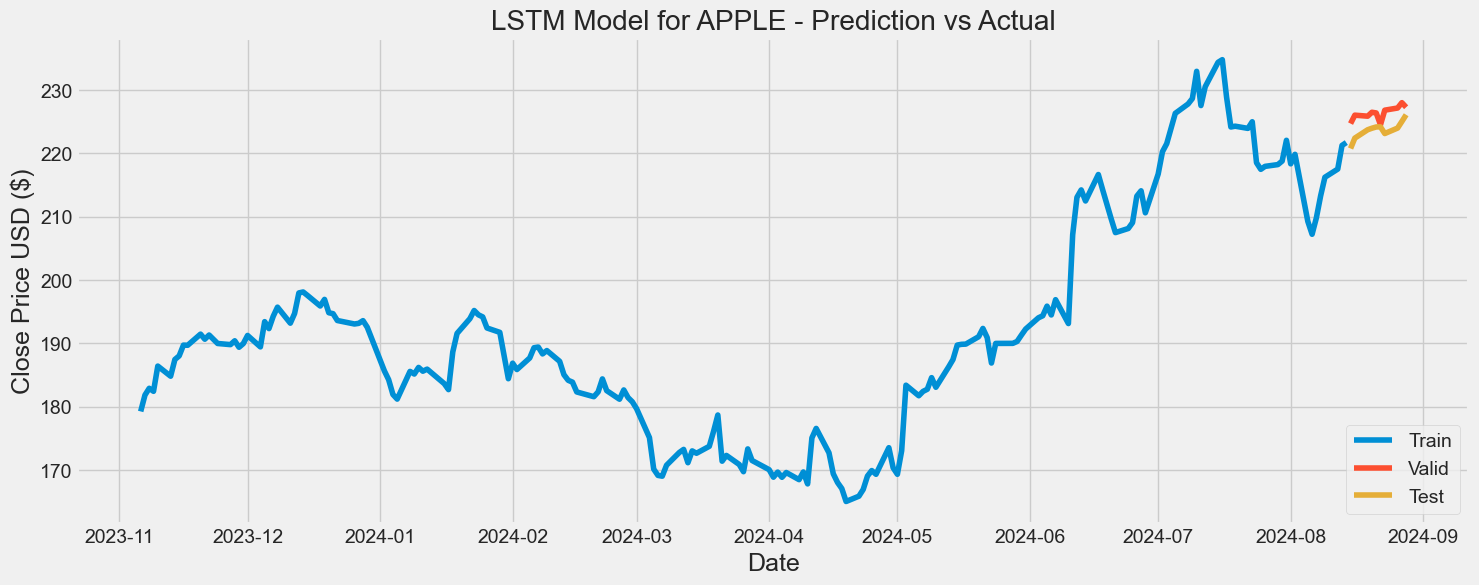



_______________________________ 

 for stock: GOOGLE 

_______________________________


Training data length: 194
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0490
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0100
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0078
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0100
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0059
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0062
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0051
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0050
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
RMSE: 2.3477407572634204


C:\Users\palaa\AppData\Local\Temp\ipykernel_24748\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



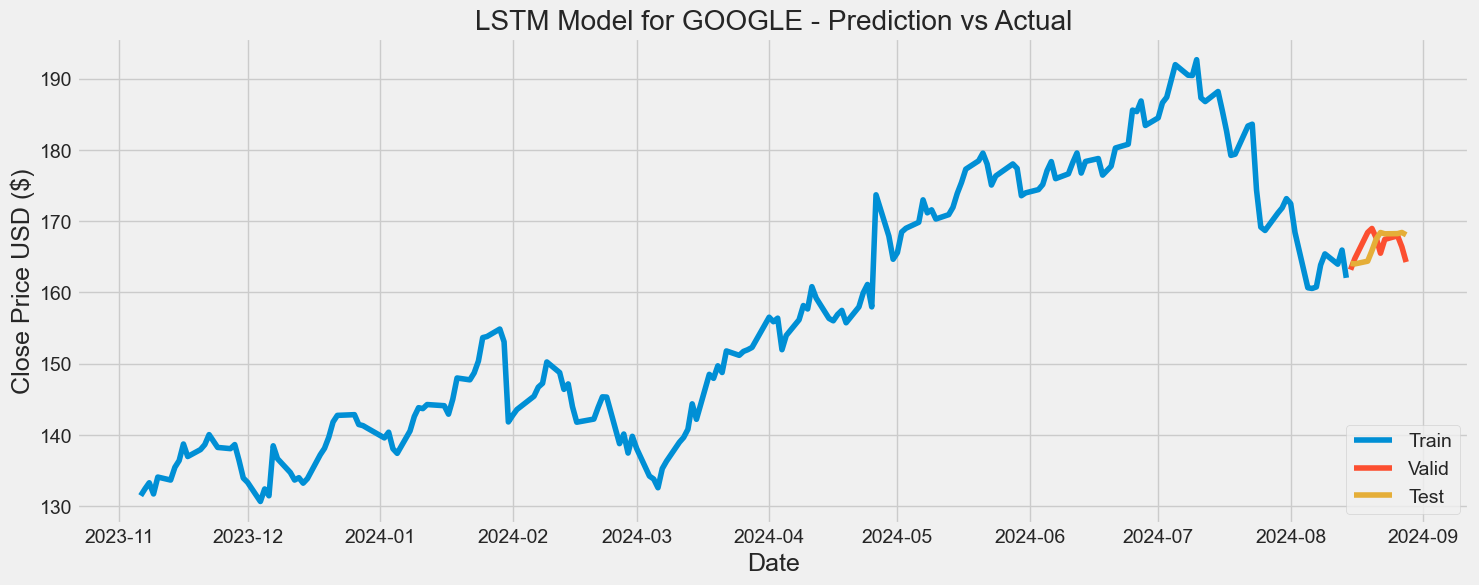



_______________________________ 

 for stock: MICROSOFT 

_______________________________


Training data length: 194
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0392
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0094
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0068
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0089
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0052
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0062
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0039
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0044
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0047
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0051
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
RMSE: 4.758122176747065


C:\Users\palaa\AppData\Local\Temp\ipykernel_24748\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



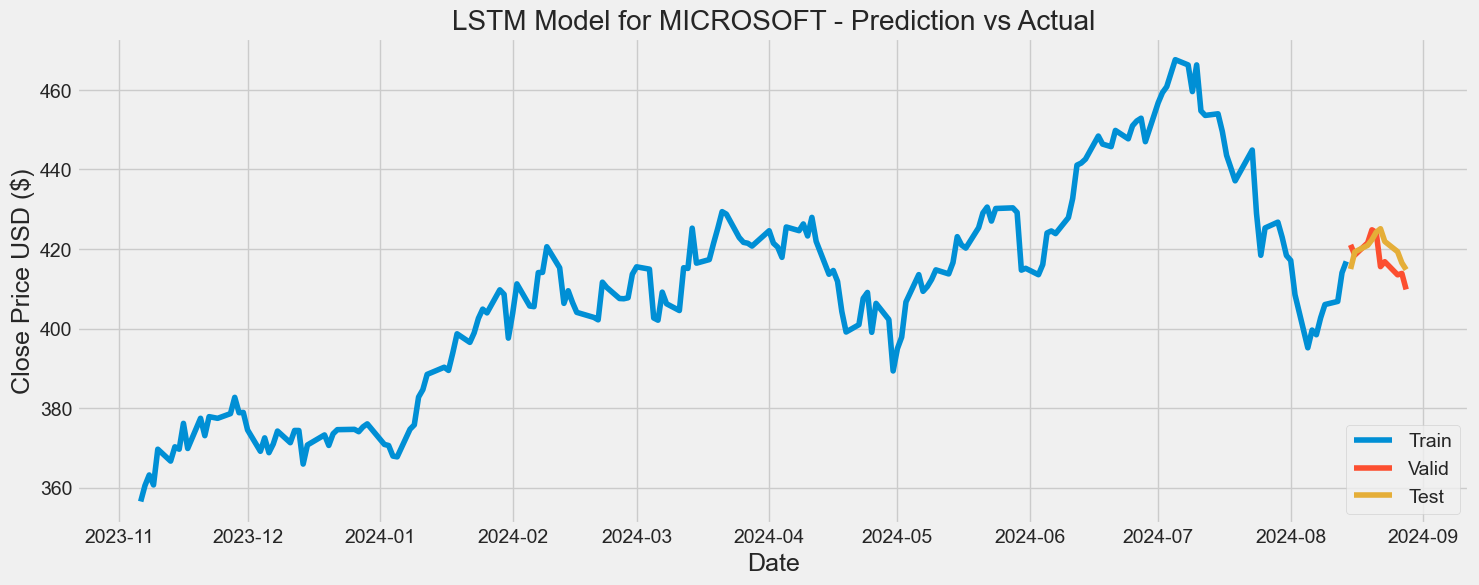



_______________________________ 

 for stock: AMAZON 

_______________________________


Training data length: 194
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0391
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0116
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0090
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0060
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0084
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0048
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0048
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0035
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0066
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0044
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
RMSE: 2.9286258617777294


C:\Users\palaa\AppData\Local\Temp\ipykernel_24748\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



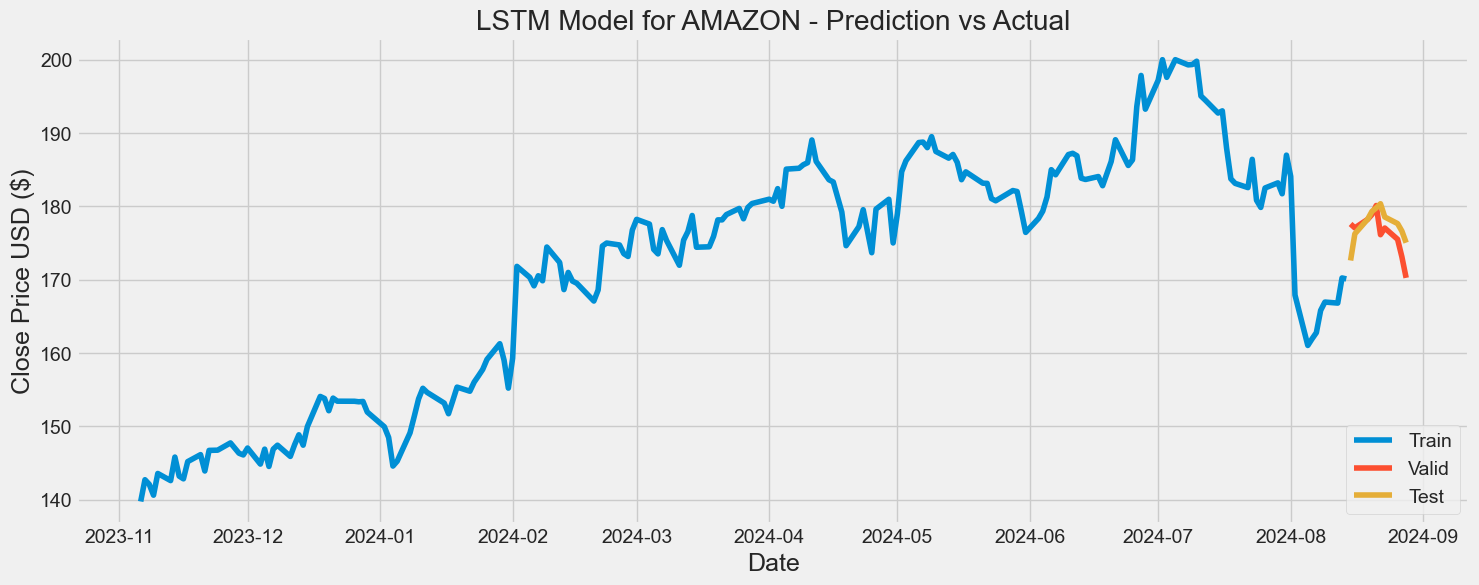



_______________________________ 

 for stock: TESLA 

_______________________________


Training data length: 194
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0582
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0098
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0116
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0071
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0075
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0067
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0066
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0076
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0092
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
RMSE: 8.42347263417316


C:\Users\palaa\AppData\Local\Temp\ipykernel_24748\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



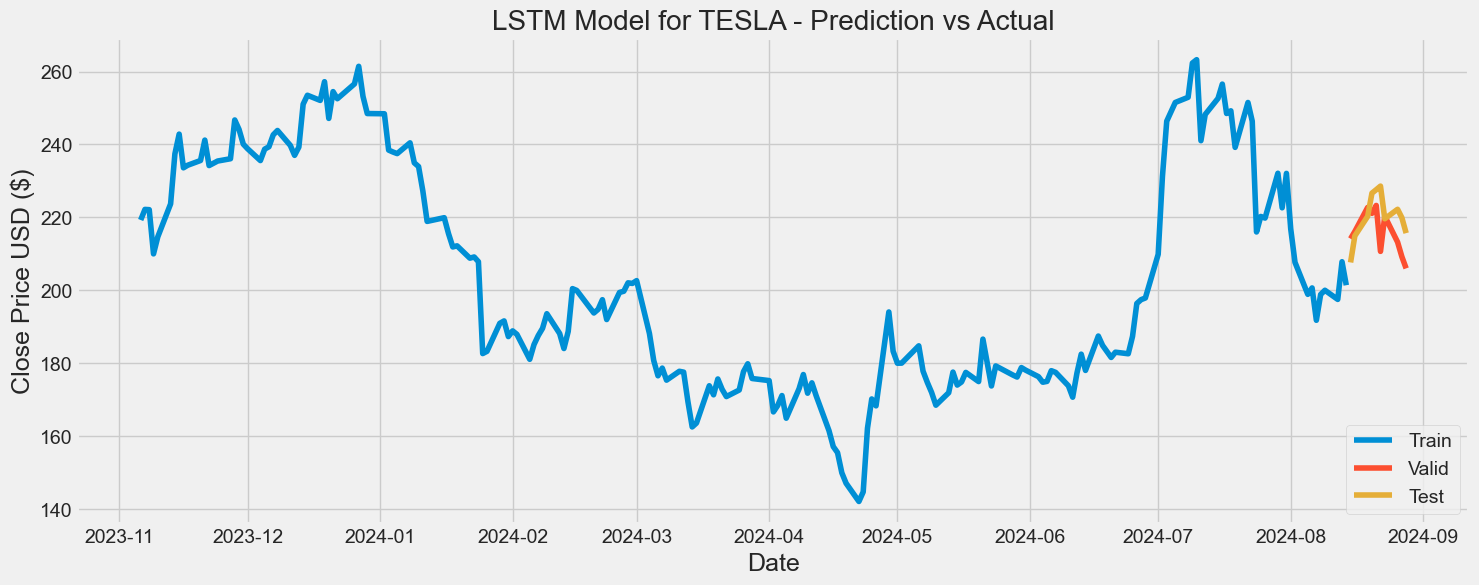



_______________________________ 

 for stock: NVIDIA 

_______________________________


Training data length: 194
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0635
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0089
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0059
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0069
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0033
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0052
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0049
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0032
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0048
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
RMSE: 6.49275083353391


C:\Users\palaa\AppData\Local\Temp\ipykernel_24748\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



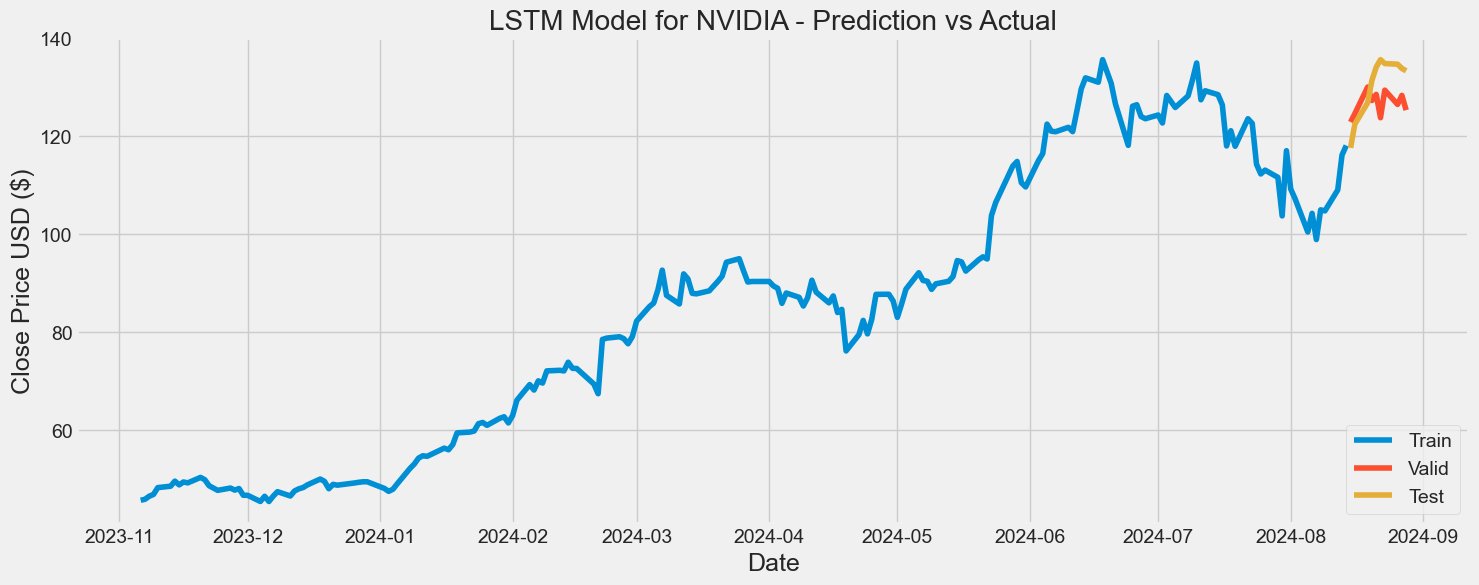

In [14]:
for stock_symbol, com_name in zip(company_list, company_name):
    print(f"\n\n_______________________________ \n\n for stock: {com_name} \n\n_______________________________\n\n")

    # Assuming stock_symbol is a DataFrame with columns including 'Close'
    df = pd.DataFrame(stock_symbol)
    df.dropna(inplace=True)

    # Create a new dataframe with only the 'Close' column
    data = df.filter(['Close'])

    # Convert the dataframe to a numpy array
    dataset = data.values

    # Get the number of rows to train the model on
    training_data_len = int(np.ceil(len(dataset) * .95))
    print(f"Training data length: {training_data_len}")

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Create the training data set
    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    
    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)  # Adjust epochs as needed

    # Create the testing data set
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    y_test = dataset[training_data_len:, :]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    # Convert the x_test data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get the model's predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
    print("RMSE:", rmse)

    # Prepare for plotting
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions

    # Plot the data
    plt.figure(figsize=(16,6))
    plt.title(f'LSTM Model for {com_name} - Prediction vs Actual')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'], label='Train')
    plt.plot(valid[['Close']], label='Valid')
    plt.plot(valid[['Predictions']], label='Test')
    plt.legend(loc='lower right')
    plt.show()


 # Training ML model to predict Close using All the features #



_______________________________ 

 for stock: APPLE 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1415 - val_loss: 0.2444
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - val_loss: 0.0519
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - val_loss: 0.0070
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - val_loss: 0.0169
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - val_loss: 0.0315
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - val_loss: 0.0286
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - val_loss: 0.0178
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0091
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - val_loss: 0.0091
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - val_loss: 0.0083
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - val_loss: 0.0050
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0064
Epoch 13/20
8/8 ━━━━━━━

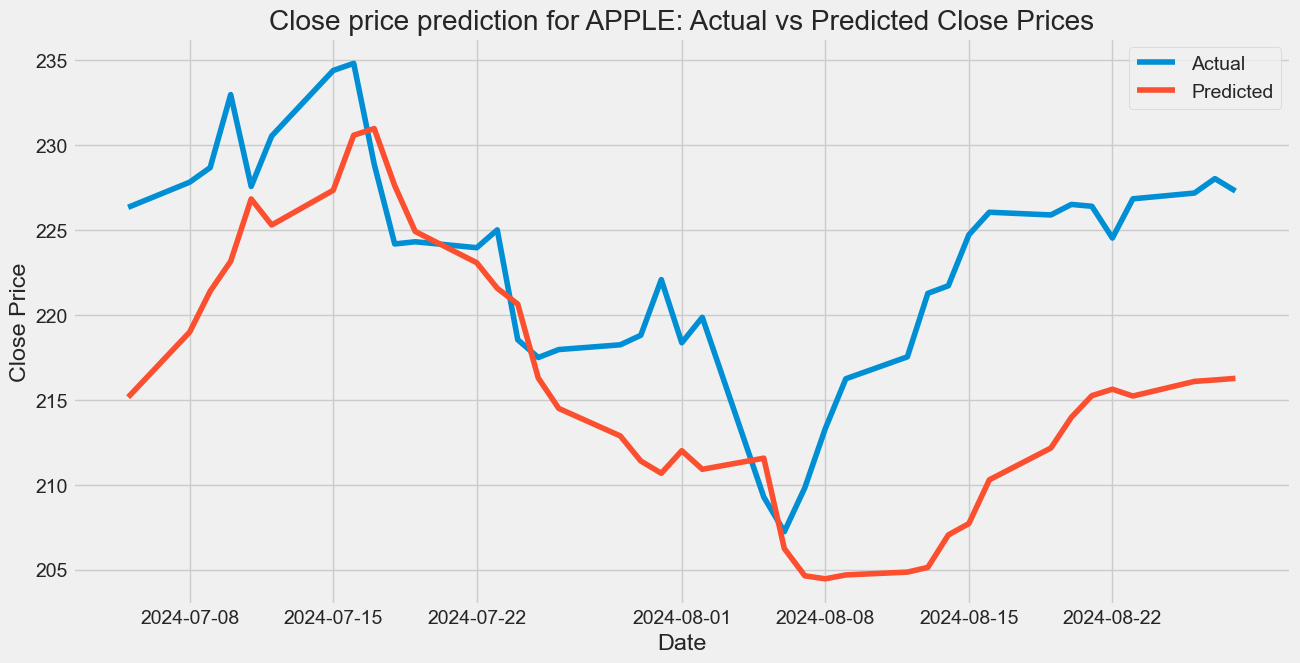



_______________________________ 

 for stock: GOOGLE 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0524 - val_loss: 0.0680
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - val_loss: 0.0216
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - val_loss: 0.0070
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - val_loss: 0.0140
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - val_loss: 0.0145
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0039 - val_loss: 0.0137
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041 - val_loss: 0.0419
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0043 - val_loss: 0.0282
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038 - val_loss: 0.0174
Epoch 13/20
8/8 ━━━

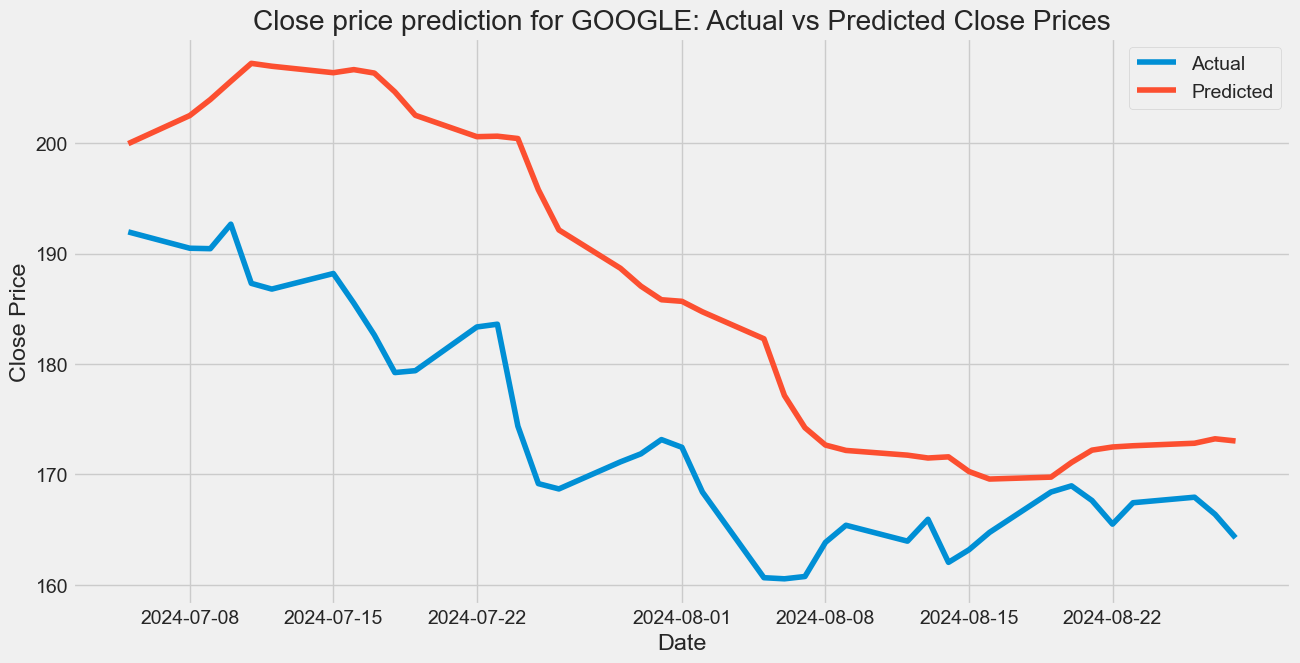



_______________________________ 

 for stock: MICROSOFT 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2766 - val_loss: 0.3615
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0783 - val_loss: 0.0384
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094 - val_loss: 0.0038
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - val_loss: 0.0123
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - val_loss: 0.0366
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - val_loss: 0.0305
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058 - val_loss: 0.0157
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056 - val_loss: 0.0117
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - val_loss: 0.0133
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 - val_loss: 0.0107
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - val_loss: 0.0089
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - val_loss: 0.0066
Epoch 13/20
8/8 ━━━━

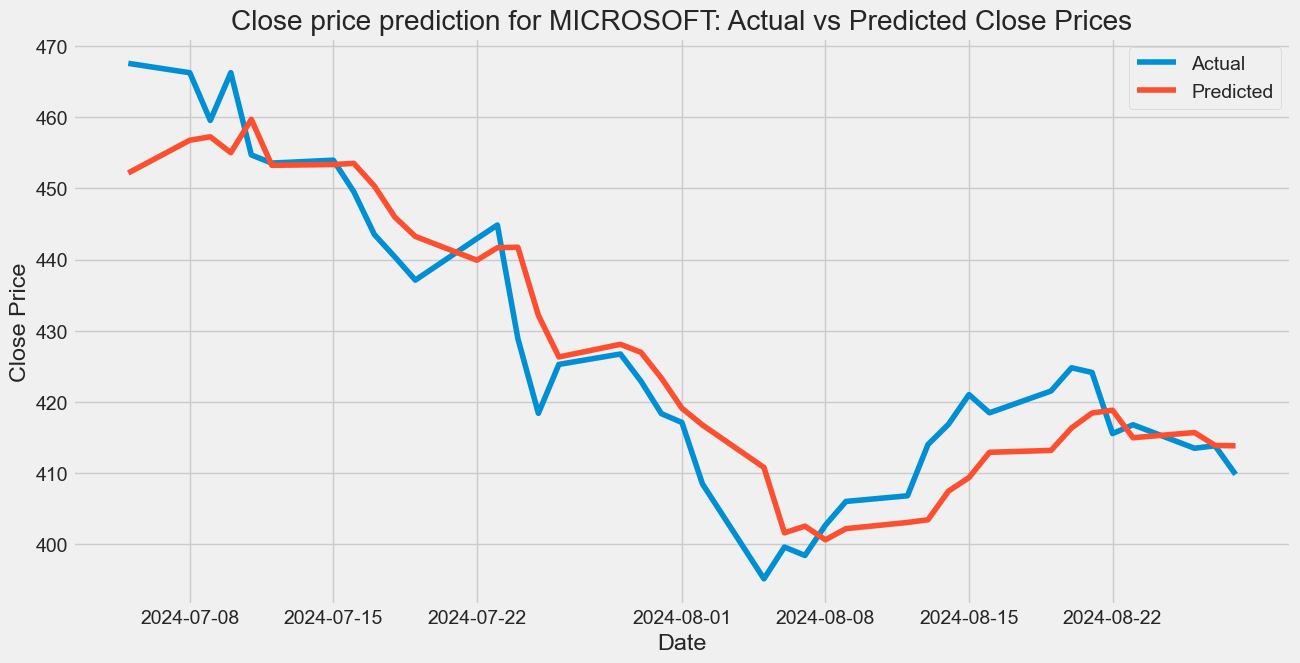



_______________________________ 

 for stock: AMAZON 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0865 - val_loss: 0.0090
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0145 - val_loss: 0.0186
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0068 - val_loss: 0.0098
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0063 - val_loss: 0.0071
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048 - val_loss: 0.0088
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041 - val_loss: 0.0067
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046 - val_loss: 0.0060
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0040 - val_loss: 0.0059
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0036 - val_loss: 0.0057
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0044 - val_loss: 0.0055
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0034 - val_loss: 0.0052
Epoch 13/20

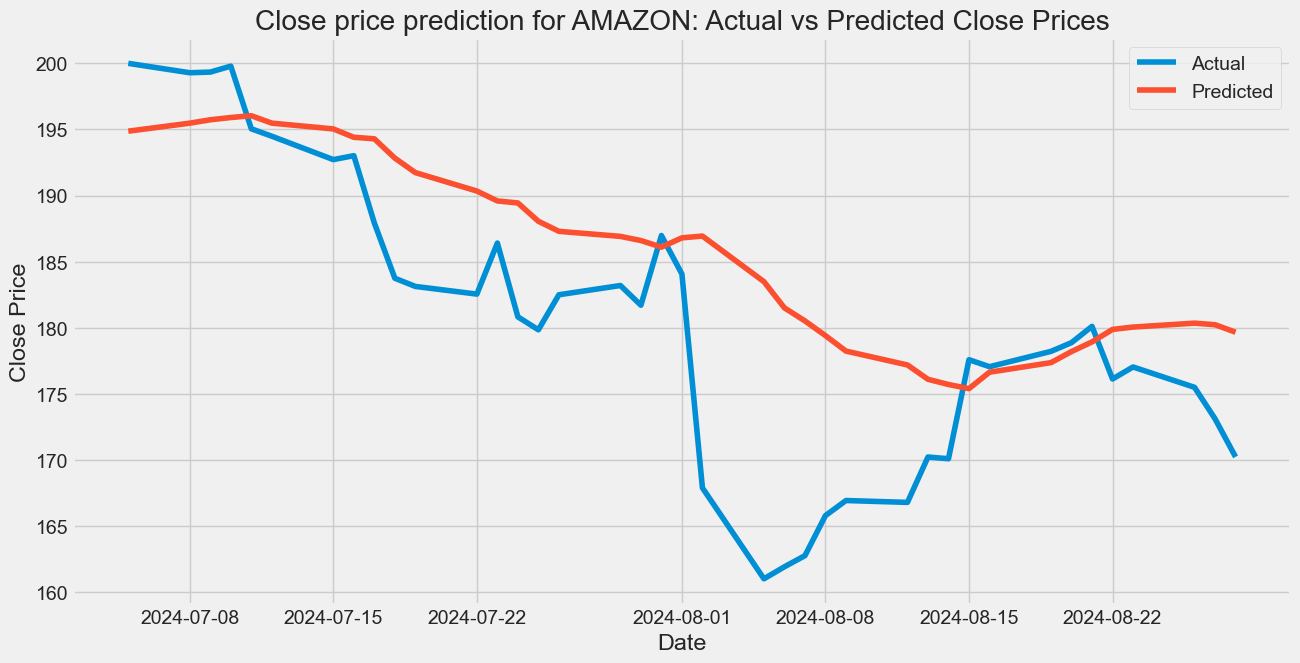



_______________________________ 

 for stock: TESLA 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.2525 - val_loss: 0.0877
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0225 - val_loss: 0.0341
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0286 - val_loss: 0.0468
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0137 - val_loss: 0.0549
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0110 - val_loss: 0.0422
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0098 - val_loss: 0.0371
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0085 - val_loss: 0.0408
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0079 - val_loss: 0.0407
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0073 - val_loss: 0.0374
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0081 - val_loss: 0.0373
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0075 - val_loss: 0.0389
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069 - val_loss: 0.0341
Epoch 13/20

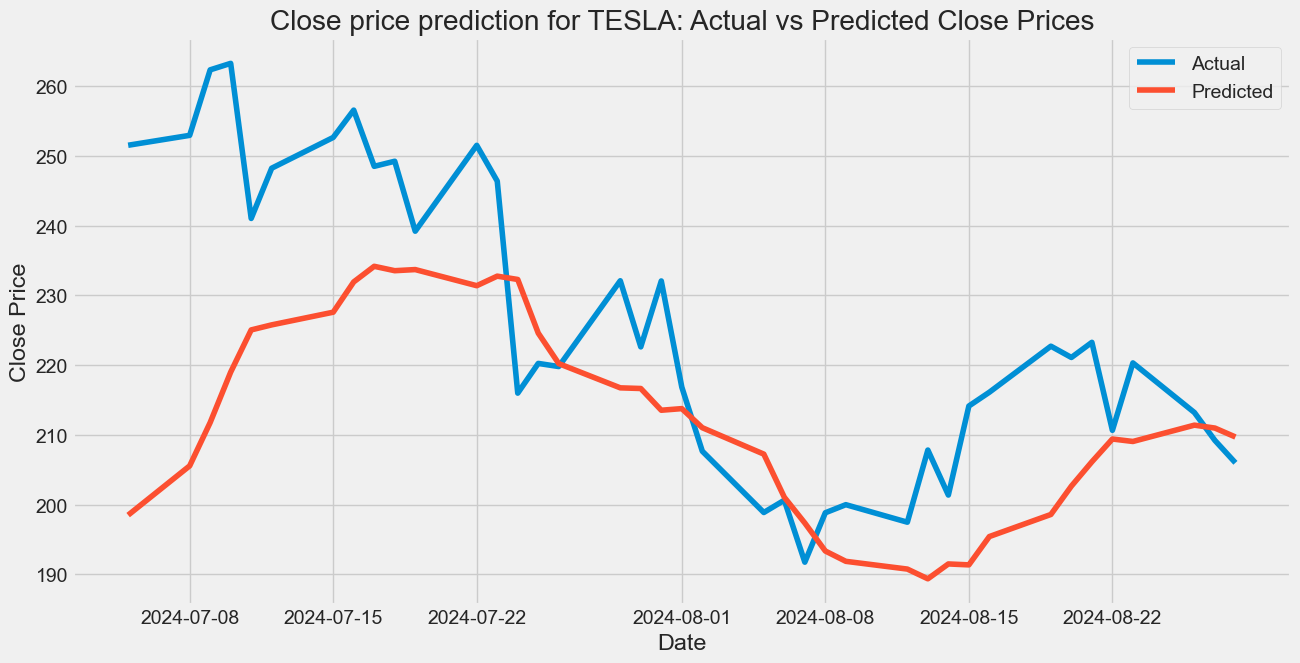



_______________________________ 

 for stock: NVIDIA 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.1886 - val_loss: 0.5644
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0650 - val_loss: 0.1797
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0156 - val_loss: 0.0111
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0055 - val_loss: 0.0194
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033 - val_loss: 0.0092
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0018 - val_loss: 0.0173
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0018 - val_loss: 0.0124
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0015 - val_loss: 0.0086
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0013 - val_loss: 0.0081
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.9302e-04 - val_loss: 0.0079
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.4326e-04 - val_loss: 0.0076
Epo

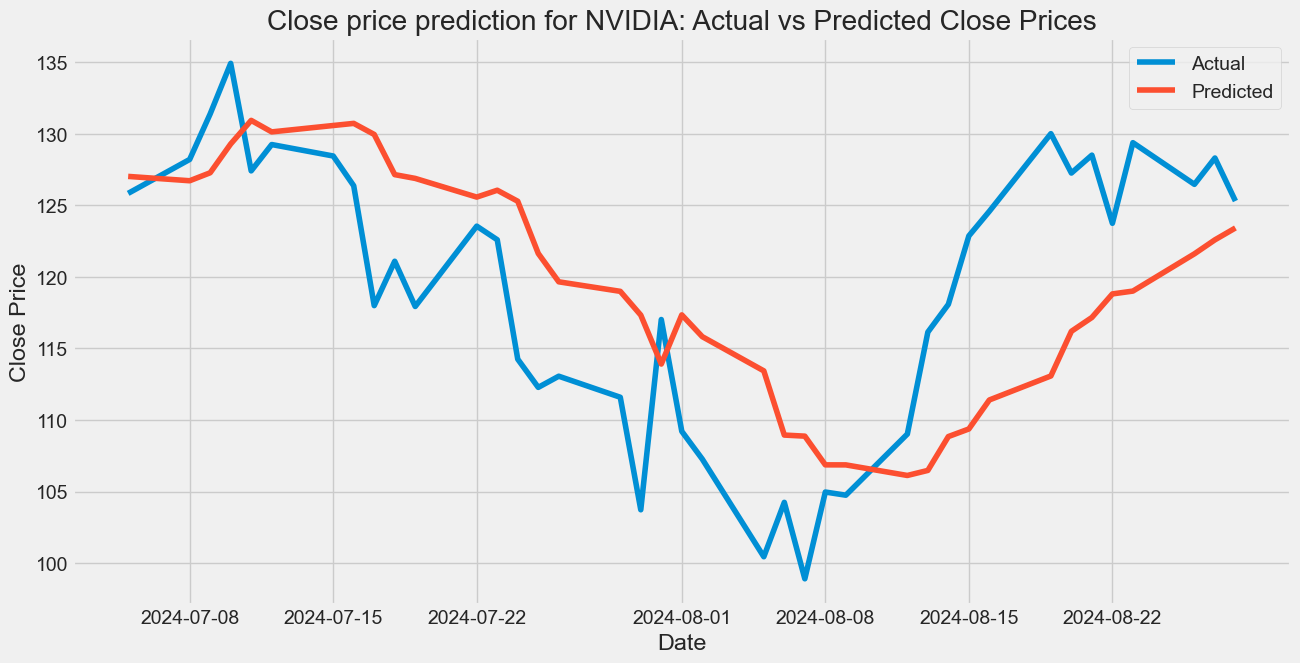

In [17]:
def prepare_and_train_model(df,com_name, time_steps=10):
    # Drop rows with missing values
    df.dropna(inplace=True)
    
    # Separate features and target
    X = df.drop(columns=['Close', 'company_name'])
    Y = df['Close']
    
    # Normalize features and target
    scaler_features = MinMaxScaler()
    scaler_target = MinMaxScaler()
    
    scaled_features = scaler_features.fit_transform(X)
    scaled_target = scaler_target.fit_transform(Y.values.reshape(-1, 1))
    
    # Prepare the dataset
    def create_dataset(features, target, time_steps):
        X, y = [], []
        for i in range(len(features) - time_steps):
            X.append(features[i:(i + time_steps)])
            y.append(target[i + time_steps])
        return np.array(X), np.array(y)
    
    X, y = create_dataset(scaled_features, scaled_target, time_steps)
    
    # Split the dataset
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
    
    # Define the model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(time_steps, X.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))
    
    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss}')
    
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Rescale back to original values
    y_test_rescaled = scaler_target.inverse_transform(y_test)
    y_pred_rescaled = scaler_target.inverse_transform(y_pred)
    
    # Plot results
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[-len(y_test):], y_test_rescaled, label='Actual')
    plt.plot(df.index[-len(y_test):], y_pred_rescaled, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Close price prediction for {com_name}: Actual vs Predicted Close Prices')
    plt.legend()
    plt.show()
    
    return model

# Iterate over companies and process each one
for stock_symbol, com_name in zip(company_list, company_name):
    print(f"\n\n_______________________________ \n\n for stock: {com_name} \n\n_______________________________\n\n")
    
    # Create DataFrame for the current company
    df = pd.DataFrame(stock_symbol)
    
    # Prepare, train, and evaluate the model for this company
    model = prepare_and_train_model(df, com_name)